In [1]:
## Add path to sys
import sys
sys.path.append('../')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from preprocessing import data_processing
from glob import glob
import pandas as pd

In [2]:
train_dataset = 'D:/Projects/tumai_braintumor_classification/dataset/train/'
test_dataset = 'D:/Projects/tumai_braintumor_classification/dataset/test/'

train_generator, test_generator = data_processing.create_train_test_dataset(train_dataset, test_dataset)

Found 202 images belonging to 2 classes.


Found 51 images belonging to 2 classes.


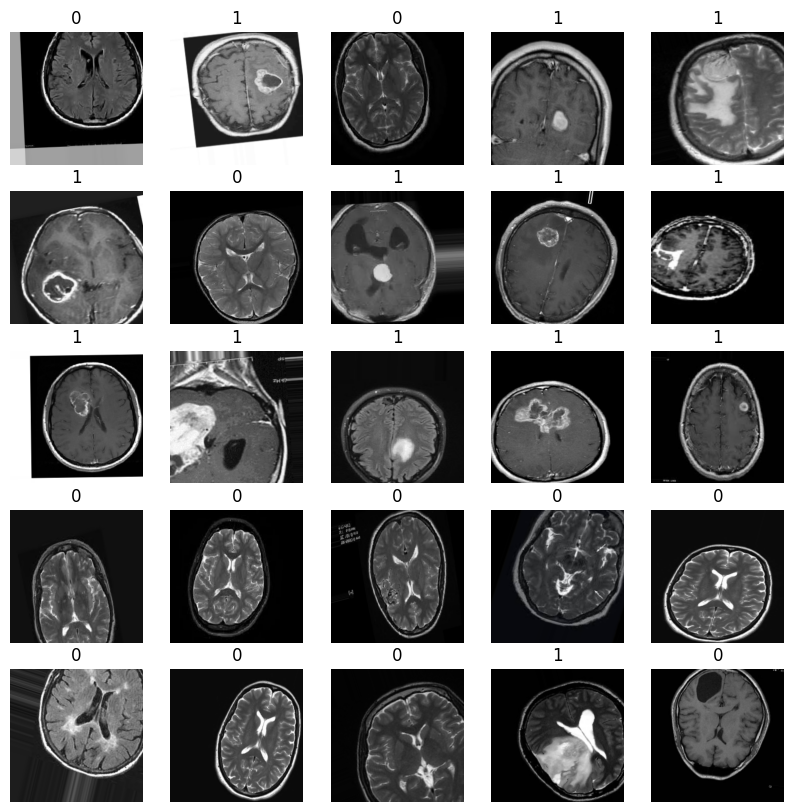

In [3]:
## Plot a sample from train_generator

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
image_batch, label_batch = next(iter(train_generator))

# Show 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i])
    plt.title(np.argmax(label_batch[i]))
    plt.axis("off")

plt.show()



#### Tring a transfer learning approach

In [17]:
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
## Create the model
# Load the ResNet50V2 model
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers
for layer in resnet.layers:
    layer.trainable = False

# Add a flatten layer
x = GlobalAveragePooling2D()(resnet.output)

# Add a dense layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a dense layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a dense layer
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the output layer
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=resnet.input, outputs=output)

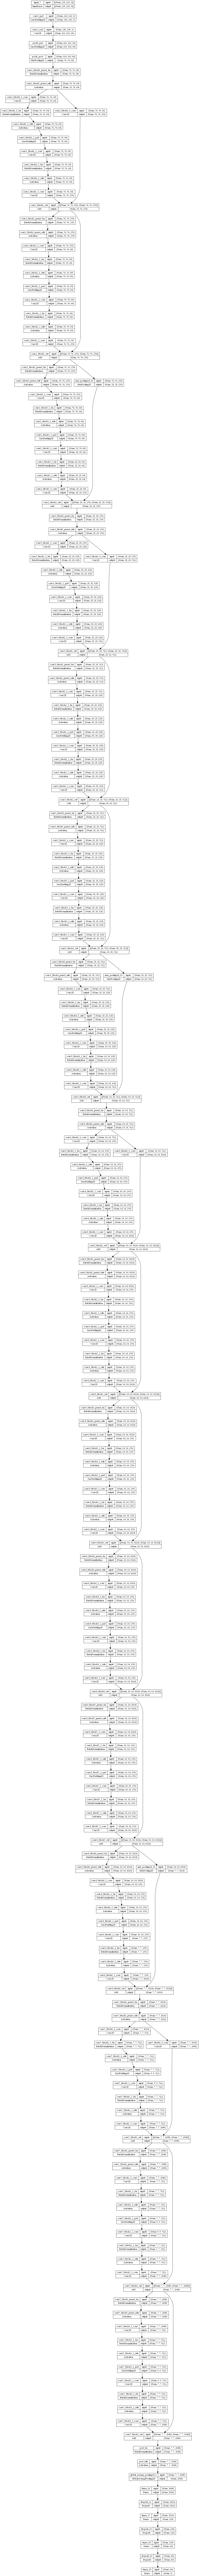

In [22]:
# Compile the model
from tensorflow.keras.utils import plot_model

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



In [23]:
## Train the model
# Set the number of epochs
epochs = 100

# Set the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Set the model checkpoint criteria
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=epochs, callbacks=[early_stopping, checkpoint])

# Save the model
model.save('model.h5')


Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 5.4935 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 1.80623, saving model to model.h5
7/7 [==============================] - 17s 2s/step - loss: 5.4935 - accuracy: 0.5000 - val_loss: 1.8062 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.7700 - accuracy: 0.5000
Epoch 2: val_loss improved from 1.80623 to 0.71862, saving model to model.h5
7/7 [==============================] - 11s 2s/step - loss: 1.7700 - accuracy: 0.5000 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.8743 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.71862 to 0.69450, saving model to model.h5
7/7 [==============================] - 12s 2s/step - loss: 0.8743 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.7406 - accuracy: 0.5000
Epoch 4: val_loss im